In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('./Data/서울시 코로나19 확진자 현황.csv', low_memory=False)

In [73]:
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      99550 non-null  int64  
 1   확진일     99550 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      99550 non-null  object 
 6   여행력     1717 non-null   object 
 7   접촉력     99550 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      99550 non-null  object 
 10  이동경로    10000 non-null  object 
 11  등록일     99550 non-null  object 
 12  수정일     99550 non-null  object 
 13  노출여부    99550 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 10.6+ MB


In [75]:
df = df.drop(columns=['환자번호','환자정보','국적','조치사항','이동경로','등록일','수정일'])

In [76]:
# 확진일 데이터 유형 변경
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
 6   노출여부    99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB


In [77]:
print(df['지역'].nunique())   # 개수
df['지역'].unique()

29


array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [78]:
# 문자열 공백제거
df['지역'] = df['지역'].str.strip()
print(df['지역'].unique())
df['지역'].nunique()   # 개수

['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구']


27

In [79]:
df['지역'] = df['지역'].astype('category')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
 6   노출여부    99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 4.7+ MB


In [81]:
# 결측치정보
df.isnull().sum()

연번          0
확진일         0
지역          0
여행력     97833
접촉력         0
상태          0
노출여부        0
dtype: int64

# 구별 확진자 동향
## 확진일-구별로 pivot_table로 집계

In [82]:
df

,연번,확진일,지역,여행력,접촉력,상태,노출여부
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-,Y
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-,Y
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-,Y
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-,Y
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-,Y
...,...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,Y
99546,4,2020-01-30,마포구,중국,해외유입,퇴원,Y
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,Y
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원,Y


In [101]:
#df.pivot(index='확진일', columns='지역', values='score').head()
df_gu = df.pivot_table(index='확진일', columns='지역', values='연번', aggfunc='count', margins=True)
df_gu.tail()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842
2021-09-28 00:00:00,45,51,25,41,48,36,55,31,65,29,...,68,27,43,24,47,23,37,26,43,1054
All,6926,3782,2606,4447,5418,3486,4168,2064,2321,3932,...,6356,3291,4463,2705,4284,1617,1708,3729,4715,99550


In [102]:
# 서울시 일별 추가확진자 동향
s_date = df_gu['All'][:-1]
print(type(s_date))

<class 'pandas.core.series.Series'>


In [103]:
# 서울시 일별 추가확진자 많은 순으로
s_date.sort_values(as
                   
                   cending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

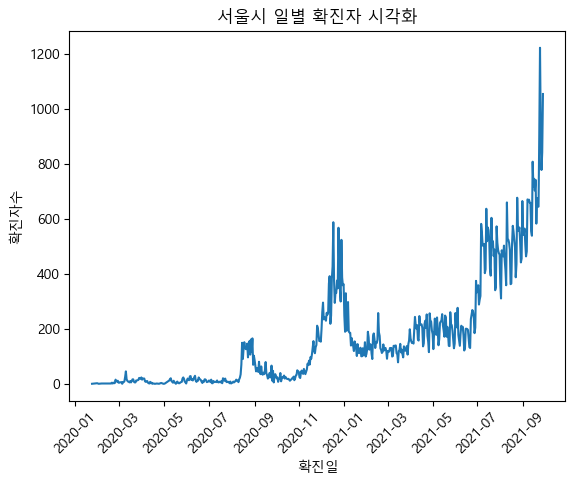

In [106]:
# 서울시 일별 추가 확진자 시각화
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

In [108]:
# 서울시 구별 누적 확진자 비교
s_gu = df_gu.loc['All'][:-1]   # 가로세로 총합은 필요없으므로 인덱싱

In [109]:
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

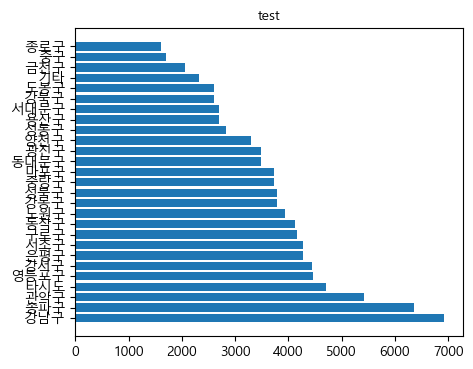

In [111]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('test', size=10)
plt.show()


In [123]:
# 최근일(21-09-28) 어느구에서 많이 나왔는지 1,2,3등
print(df_gu.shape)
s1_gu = df_gu.iloc[-2,:-1].sort_values(ascending=False)

(583, 28)


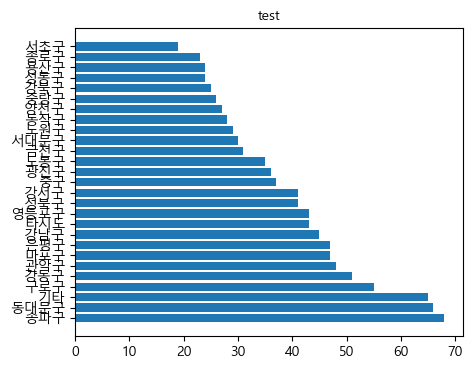

In [124]:
# 시각화
x = s1_gu.index
y = s1_gu.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.title('test', size=10)
plt.show()

In [127]:
# 접촉력에 따른 확진 분석
# 접촉력에 따른 확진 건수 best 10
print(df['접촉력'].nunique())
df['접촉력'].unique()

1096


array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [131]:
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [171]:
# 최근 월(9월) 접촉력에 따른 확진건수 best
# 확진일을 연도 2021 & 9월 추출 ['접촉력'].value_counts()[:10].to_frame
#df[조건]['접촉력'].value_counts()[:10].to_frame()

# 월 및 연도를 추출하는 pandas.Series.dt.year() 및 pandas.Series.dt.month() 메소드
# 연도 및 월을 추출하는strftime()메소드
# 연도 및 월을 추출하는pandas.DatetimeIndex.month 및pandas.DatetimeIndex.year


mask = (df['확진일'].dt.year==2021) & (df['확진일'].dt.month==9)
df[mask]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44
